In [248]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [249]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [250]:
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [251]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [252]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [253]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [254]:
sum(city_data_df["type"]=="Rural")

18

In [255]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [256]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [257]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [258]:
pyber_data_df = pd.merge(ride_data_df,city_data_df,on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [259]:
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [260]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2019-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2019-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2019-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2019-04-07 23:42:07,10.79,1615474447641,9,Rural


In [261]:
urban_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [262]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [263]:
urban_driver_count = urban_cities_df.groupby(["city"]).count()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).count()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).count()["driver_count"]

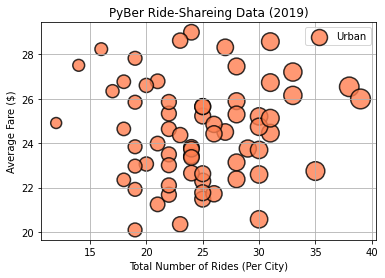

In [264]:
# create a bubble chart
plt.scatter(urban_count, urban_avg_fare, 
            s= 10 * urban_driver_count, c="coral",
           edgecolor="black", linewidths=1.5,
           alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Shareing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

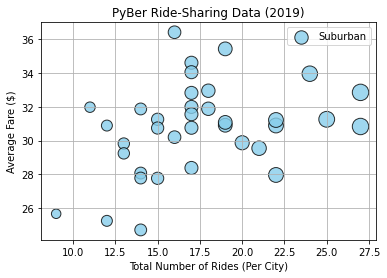

In [265]:
plt.scatter(suburban_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor = "black",linewidths = 1,
            alpha = 0.8, label ="Suburban"
           )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

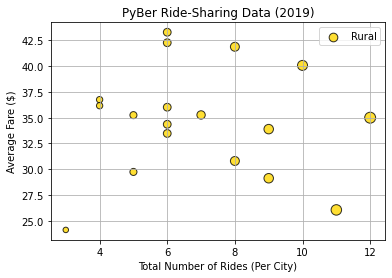

In [266]:
plt.scatter(rural_count,
           rural_avg_fare,
           s= 10 * rural_driver_count, color ="gold",
           edgecolor = "black",linewidths = 1,
           alpha = 0.8,label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

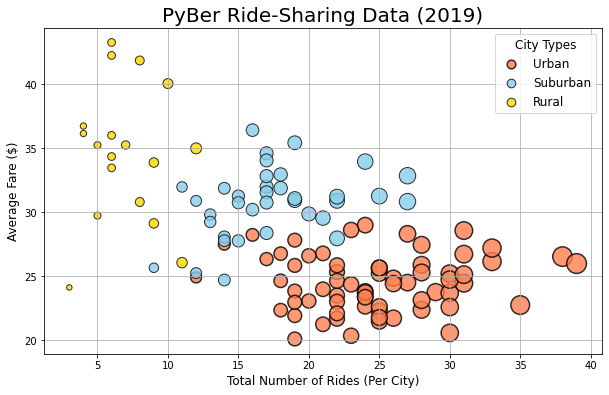

In [267]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_count, urban_avg_fare, 
            s= 10 * urban_driver_count, c="coral",
           edgecolor="black", linewidths=1.5,
           alpha = 0.8, label = "Urban")
plt.scatter(suburban_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor = "black",linewidths = 1,
            alpha = 0.8, label ="Suburban"
           )
plt.scatter(rural_count,
           rural_avg_fare,
           s= 10 * rural_driver_count, color ="gold",
           edgecolor = "black",linewidths = 1,
           alpha = 0.8,label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.grid(True)
plt.savefig("analysis/Fig1.png")
plt.show()

In [268]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [269]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [270]:
rural_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [271]:
round(urban_count.mode(),2),round(suburban_count.mode(),2),round(rural_count.mean(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 6.94)

In [272]:
import numpy as np
import scipy.stats as sts

In [273]:
mean_urban_count = np.mean(urban_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_count:.2f}.")

median_urban_count = np.median(urban_count)
print(f"The median for the ride counts for urban trips is {median_urban_count}.")

mode_urban_count = sts.mode(urban_count)
print(f"The modefor the ride counts for urban trips is {mode_urban_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The modefor the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [274]:
mean_suburban_count = np.mean(suburban_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_count:.2f}.")

median_suburban_count = np.median(suburban_count)
print(f"The median for the ride counts for urban trips is {median_suburban_count}.")

mode_suburban_count = sts.mode(suburban_count)
print(f"The modefor the ride counts for urban trips is {mode_suburban_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The modefor the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [275]:
mean_rural_count = np.mean(rural_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_count:.2f}.")

median_rural_count = np.median(rural_count)
print(f"The median for the ride counts for urban trips is {median_rural_count}.")

mode_rural_count = sts.mode(rural_count)
print(f"The modefor the ride counts for urban trips is {mode_rural_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The modefor the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [276]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [277]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [278]:
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [279]:
urban_driver = urban_cities_df["driver_count"]
suburban_driver = suburban_cities_df["driver_count"]
rural_driver = rural_cities_df["driver_count"]

In [280]:
mean_urban_driver = np.mean(urban_driver)
mean_suburban_driver = np.mean(suburban_driver)
mean_rural_driver = np.mean(rural_driver)
print(f"{mean_urban_driver:.2f}, {mean_suburban_driver:.2f},{mean_rural_driver:.2f}")

36.68, 13.71,4.30


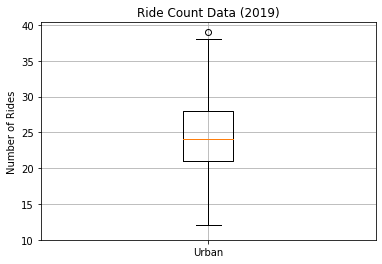

In [281]:
x_labels= ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_count,labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,step = 5.0))
ax.grid()
plt.show()

In [282]:
urban_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

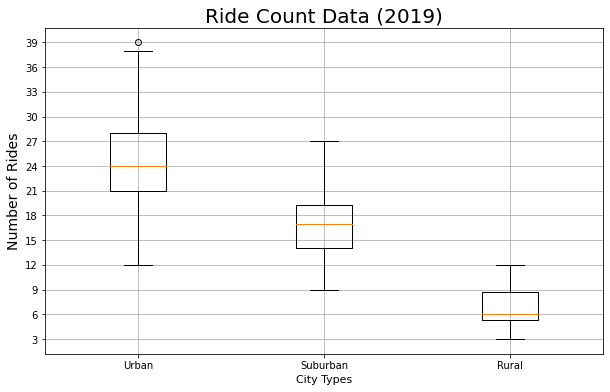

In [283]:
x_labels= ["Urban","Suburban","Rural"]
ride_count_data = [urban_count,suburban_count,rural_count]
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)",fontsize = 20)
ax.set_ylabel("Number of Rides",fontsize = 14)
ax.set_xlabel("City Types",fontsize = 11)
ax.set_yticks(np.arange(0,45,step = 3.0))
ax.boxplot(ride_count_data,labels = x_labels)
ax.grid()
plt.savefig("analysis/Fig2.png")
#plt.show()

In [284]:
urban_city_outlier = urban_count[urban_count > 28]


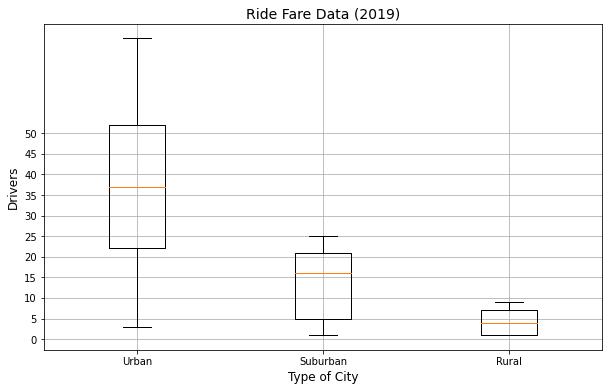

In [285]:
x_labels = ["Urban","Suburban","Rural"]
ride_driver_data = [urban_driver,suburban_driver,rural_driver]

fig,ax = plt.subplots(figsize = (10,6))
ax.set_title('Ride Fare Data (2019)',fontsize = 14)
ax.set_ylabel('Drivers',fontsize = 12)
ax.set_xlabel('Type of City',fontsize = 12)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.boxplot(ride_driver_data,labels = x_labels)
ax.set_yticks(np.arange(0,51,step = 5.0))
ax.grid()
#plt.show()
plt.savefig("analysis/Fig4.png")

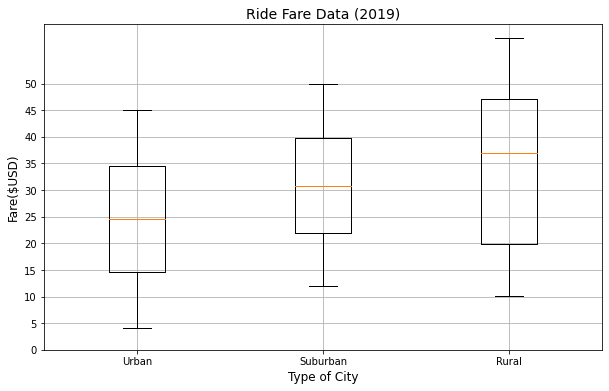

In [286]:
x_labels = ["Urban","Suburban","Rural"]
ride_fare_data = [urban_fares,suburban_fares,rural_fares]

fig,ax = plt.subplots(figsize = (10,6))
ax.set_title('Ride Fare Data (2019)',fontsize = 14)
ax.set_ylabel('Fare($USD)',fontsize = 12)
ax.set_xlabel('Type of City',fontsize = 12)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.boxplot(ride_fare_data,labels = x_labels)
ax.set_yticks(np.arange(0,51,step = 5.0))
ax.grid()

plt.savefig("analysis/Fig3.png")
#plt.show()

In [287]:
sum_fares_bytype = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_bytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [288]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [289]:
type_percents= sum_fares_bytype/total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

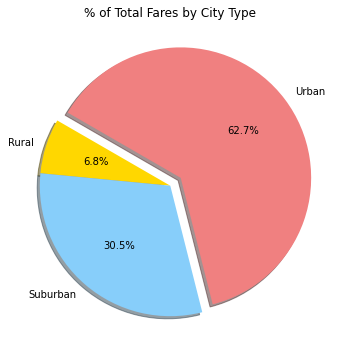

In [290]:
import matplotlib as mpl
plt.subplots(figsize = (10,6))
plt.pie(type_percents,
        labels = ["Rural","Suburban","Urban"],
        colors = ["gold","lightskyblue","lightcoral"],
        explode = [0,0,0.1],
        autopct = "%1.1f%%",
       shadow = True,startangle = 150)
plt.title("% of Total Fares by City Type")
mpl.rcParams["font.size"] = 14

plt.savefig("analysis/Fig5.png")
#plt.show()

In [291]:
ride_percent = pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count() * 100
ride_percent

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

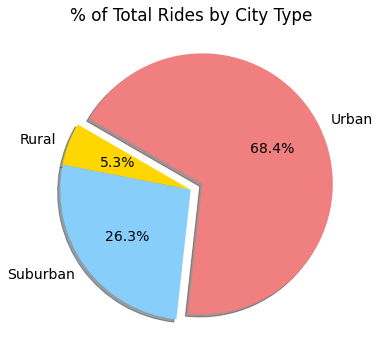

In [292]:
plt.subplots(figsize=(10,6))
plt.pie(ride_percent,
       labels = ["Rural","Suburban","Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0,0,0.1],
       autopct= "%1.1f%%",
       shadow = True,startangle = 150)
plt.title("% of Total Rides by City Type")
plt.rcParams["font.size"]= 14

plt.savefig("analysis/Fig6.png")
#plt.show()

In [293]:
driver_percent = city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum() * 100
driver_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

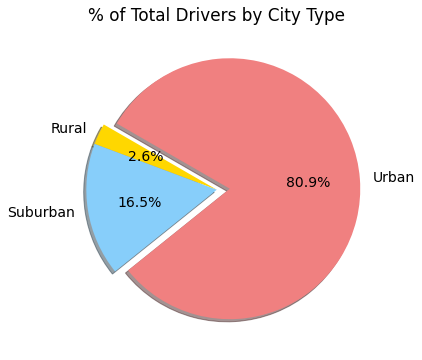

In [294]:
plt.subplots(figsize = (10,6))
plt.pie(driver_percent,
        labels = ["Rural","Suburban","Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0,0,0.1],
       autopct = "%1.1f%%",
       shadow = True, startangle = 150)

plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size']= 14

plt.savefig("analysis/Fig7.png")
#plt.show()